In [10]:
# 1) (Optional) If you haven't installed pytrends:
# !pip install pytrends

from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------------------------------
# STEP A: Define Keywords and Time Range
# -----------------------------------------------------
all_keywords = [
    "Abercrombie & Fitch haul",
    "Abercrombie try-on",
    "Abercrombie jeans review",
    "curve love",
    "abercrombie",
    "Abercrombie",
    "Abercrombie fall fashion",
    "Abercrombie winter outfits",
    "Abercrombie shopping haul"
]

# Since Google Trends allows max 5 keywords per request:
kw_group_1 = [
    "Abercrombie & Fitch haul",
    "Abercrombie try-on",
    "Abercrombie jeans review",
    "curve love",
    "abercrombie"
]

kw_group_2 = [
    "Abercrombie",
    "Abercrombie fall fashion",
    "Abercrombie winter outfits",
    "Abercrombie shopping haul"
]

timeframe = "2020-01-01 2024-12-31"  # adjust as needed
geo = ""   # "" for worldwide
gprop = "" # "" for all web search

# -----------------------------------------------------
# STEP B: Fetch Data for Group 1
# -----------------------------------------------------
pytrends = TrendReq(hl='en-US', tz=0)
pytrends.build_payload(
    kw_list=kw_group_1,
    cat=0,
    timeframe=timeframe,
    geo=geo,
    gprop=gprop
)
df_trends_1 = pytrends.interest_over_time()

# -----------------------------------------------------
# STEP C: Fetch Data for Group 2
# -----------------------------------------------------
pytrends.build_payload(
    kw_list=kw_group_2,
    cat=0,
    timeframe=timeframe,
    geo=geo,
    gprop=gprop
)
df_trends_2 = pytrends.interest_over_time()

# -----------------------------------------------------
# STEP D: Merge Both DataFrames
# -----------------------------------------------------
df_trends_combined = pd.merge(
    df_trends_1,
    df_trends_2,
    how="outer",       # or "inner" if you only want overlapping dates
    left_index=True,
    right_index=True,
    suffixes=("_g1", "_g2")  # Only used if any keyword column name overlaps
)

# -----------------------------------------------------
# STEP E: Create a Single "Total Daily" Column
# -----------------------------------------------------
# 1) Identify all keyword columns (i.e., everything except 'isPartial' if present)
keyword_cols = [col for col in df_trends_combined.columns if col != "isPartial"]

# 2) Sum across those columns (row-by-row)
df_trends_combined["abercrombie_total_daily"] = df_trends_combined[keyword_cols].sum(axis=1)

# -----------------------------------------------------
# STEP F: Convert Index to Datetime & Resample Quarterly
# -----------------------------------------------------
df_trends_combined.index = pd.to_datetime(df_trends_combined.index, errors='coerce')
df_trends_combined.sort_index(inplace=True)

# We'll aggregate by quarter, taking the MEAN
df_trends_quarterly = (
    df_trends_combined
    .resample("Q")["abercrombie_total_daily"]
    .mean()
    .to_frame("abercrombie_total_quarterly_mean")
    .reset_index()
)

# -----------------------------------------------------
# STEP G: Quick Preview & Plot
# -----------------------------------------------------
print("\nQuarterly Combined Google Trends:")
print(df_trends_quarterly.head())



TooManyRequestsError: The request failed: Google returned a response with code 429

In [11]:
df_trends_quarterly.rename(columns={"date": "Quarter"}, inplace=True)

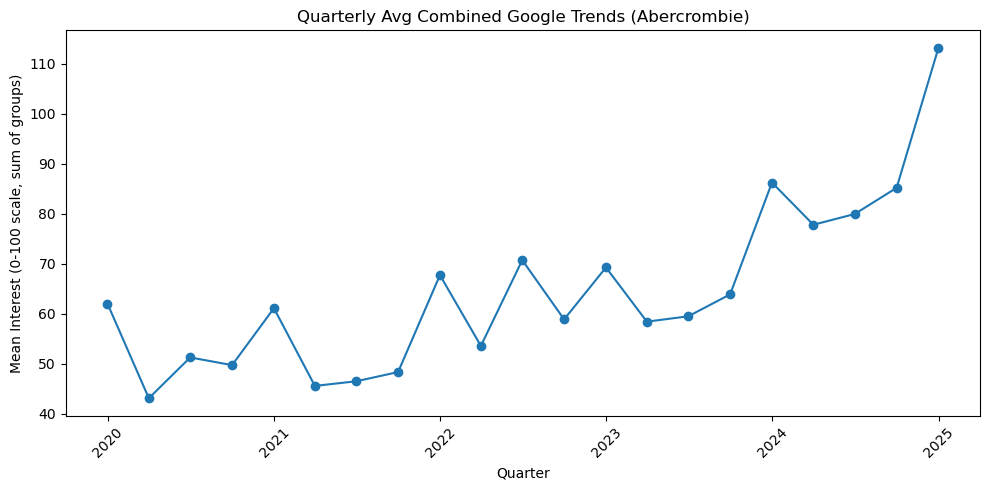

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(df_trends_quarterly["Quarter"], df_trends_quarterly["abercrombie_total_quarterly_mean"], marker="o")
plt.title("Quarterly Avg Combined Google Trends (Abercrombie)")
plt.xlabel("Quarter")
plt.ylabel("Mean Interest (0-100 scale, sum of groups)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
# Save DataFrame to CSV
df_trends_quarterly.to_csv("abercrombie_trends_quarterly.csv", index=False)
print("Quarterly Google Trends data saved to 'abercrombie_trends_quarterly.csv'.")


Quarterly Google Trends data saved to 'abercrombie_trends_quarterly.csv'.


In [13]:
df_trends_quarterly.dtypes

Quarter                             datetime64[ns]
abercrombie_total_quarterly_mean            object
dtype: object